In [ ]:
import pickle
import seaborn as sns

import matplotlib.pyplot as plt

In [1]:
%run -i 0_functions.py

# 1. Read Data

In [25]:
all_subsets = []
division = 5
for i in [1, 2, 3]:
    for j in range(division):
        dataset = read_with_pc(f"data/rep{i}_mono_subset{j}.h5ad")
        print(dataset.n_obs)
        all_subsets.append(dataset)

for i in [1, 2, 3]:
    for j in range(division):
        dataset = read_with_pc(f"data/rep{i}_ery_subset{j}.h5ad")
        print(dataset.n_obs)
        all_subsets.append(dataset)


744
744
744
744
744
758
758
758
758
758
1386
1386
1386
1386
1386
422
422
422
422
422
640
640
640
640
640
558
558
558
558
558


In [26]:
all_subsets_hvg = []
division = 5
for i in [1, 2, 3]:
    for j in range(division):
        dataset = read_with_pc(f"data/rep{i}_mono_subset{j}_hvg.h5ad")
        print(dataset.n_obs)
        all_subsets_hvg.append(dataset)

for i in [1, 2, 3]:
    for j in range(division):
        dataset = read_with_pc(f"data/rep{i}_ery_subset{j}_hvg.h5ad")
        print(dataset.n_obs)
        all_subsets_hvg.append(dataset)


744
744
744
744
744
758
758
758
758
758
1386
1386
1386
1386
1386
422
422
422
422
422
640
640
640
640
640
558
558
558
558
558


# 2. Run dynchro

In [35]:
from tqdm.notebook import tqdm

def run_dynchro(datasets, unique = False):
    results = [[0 for i in range(len(datasets))] for j in range(len(datasets))]

    for i1 in tqdm(range(len(datasets))):
        for j1 in tqdm(range(i1+1, len(datasets)), leave = False):
            # print(f"{i1} {j1}")
            d1 = datasets[i1]
            d2 = datasets[j1]

            if unique:
                # select unique var ids
                obs_ids = list(set(d1.obs_names) ^ set(d2.obs_names))
                d1_mask = d1.obs_names.isin(obs_ids) 
                d2_mask = d2.obs_names.isin(obs_ids)

                d1 = d1[d1_mask, :]
                d2 = d2[d2_mask, :]

            res = dynchro_wrapper(d1, d2)
            results[i1][j1] = res
            # fill it in the other triangle
            results[j1][i1] = res

    return results

In [36]:
results_all_subsets = run_dynchro(all_subsets)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

In [37]:
pickle.dump(results_all_subsets, open("results/results_dynchro_all_genes_subsets.pkl", "wb"))

In [38]:
results_all_hvg = run_dynchro(all_subsets_hvg)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

In [39]:
pickle.dump(results_all_hvg, open("results/results_dynchro_hvg_subsets.pkl", "wb"))

# 3. Visualisations

In [40]:
all_labels = ["rep1_sub1_mono", "rep1_sub2_mono", "rep1_sub3_mono", "rep1_sub4_mono", "rep1_sub5_mono", "rep2_sub1_mono", "rep2_sub2_mono", "rep2_sub3_mono", "rep2_sub4_mono", "rep2_sub5_mono", "rep3_sub1_mono", "rep3_sub2_mono", "rep3_sub3_mono", "rep3_sub4_mono", "rep3_sub5_mono", "rep1_sub1_ery", "rep1_sub2_ery", "rep1_sub3_ery", "rep1_sub4_ery", "rep1_sub5_ery", "rep2_sub1_ery", "rep2_sub2_ery", "rep2_sub3_ery", "rep2_sub4_ery", "rep2_sub5_ery", "rep3_sub1_ery", "rep3_sub2_ery", "rep3_sub3_ery", "rep3_sub4_ery", "rep3_sub5_ery"]


In [41]:
dist = [[res[0].dist() if not isinstance(res, int) else 0 for res in res1] for res1 in results_all_subsets]
dist_norm = [[res[0].dist_norm() if not isinstance(res, int) else 0 for res in res1] for res1 in results_all_subsets]
dist_norm_path = [[res[0].dist_norm_path() if not isinstance(res, int) else 0 for res in res1] for res1 in results_all_subsets]

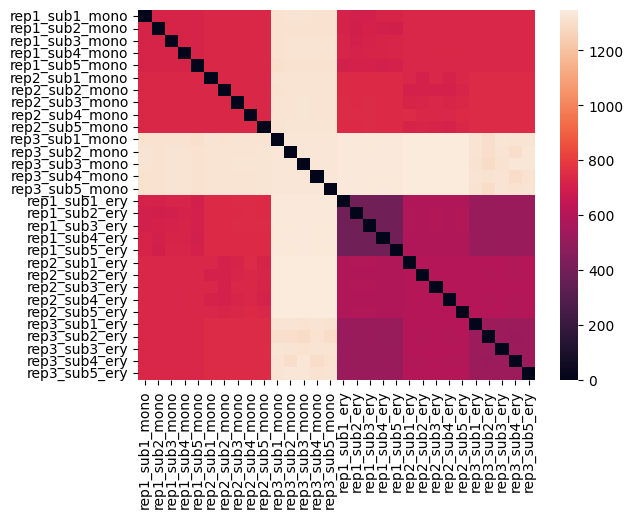

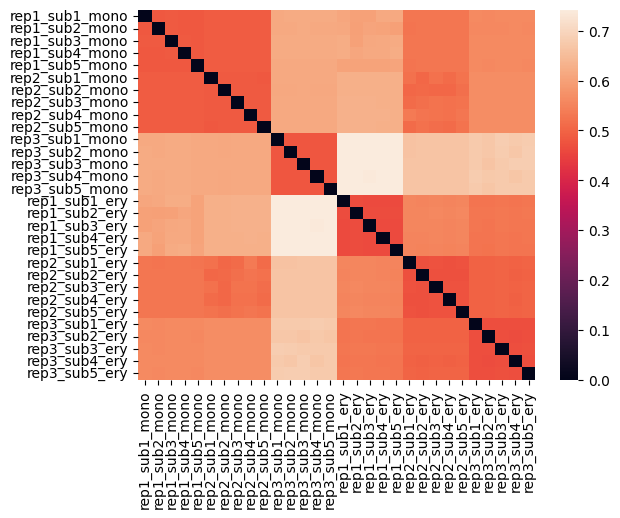

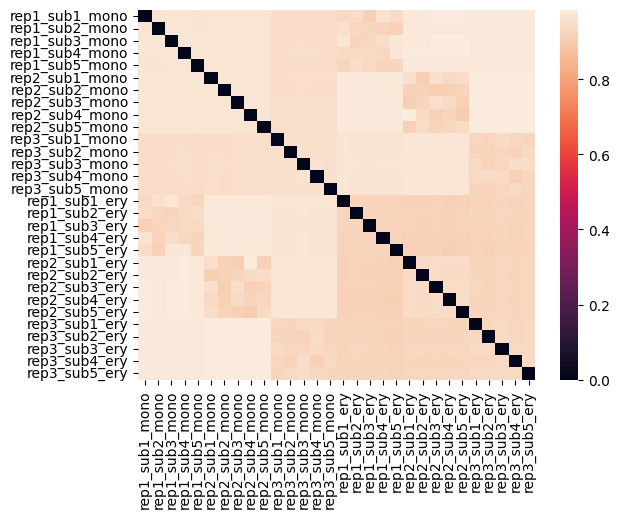

In [42]:
sns.heatmap(dist, xticklabels=all_labels, yticklabels=all_labels)
plt.show()
sns.heatmap(dist_norm, xticklabels=all_labels, yticklabels=all_labels)
plt.show()
sns.heatmap(dist_norm_path, xticklabels=all_labels, yticklabels=all_labels)
plt.show()